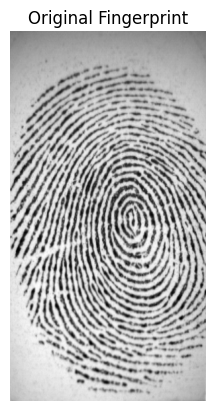

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('DB2_B/101_1.tif',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original Fingerprint")
plt.axis('off')
plt.show()

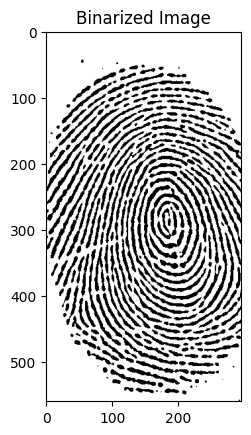

In [7]:
img = cv2.imread("DB2_B/101_1.tif", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5,5), 0)
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 10)
plt.imshow(binary, cmap='gray')
plt.title("Binarized Image")
plt.show() 

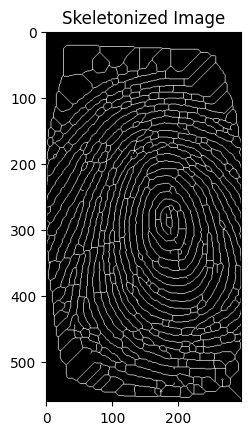

In [8]:
from skimage.morphology import skeletonize

img = cv2.imread("DB2_B/101_1.tif", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5,5), 0)
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 10)

skeleton = skeletonize(binary // 255)  # Binarize the image for skeletonization
plt.imshow(skeleton, cmap='gray')
plt.title("Skeletonized Image")
plt.show()

Detected 572 minutiae points


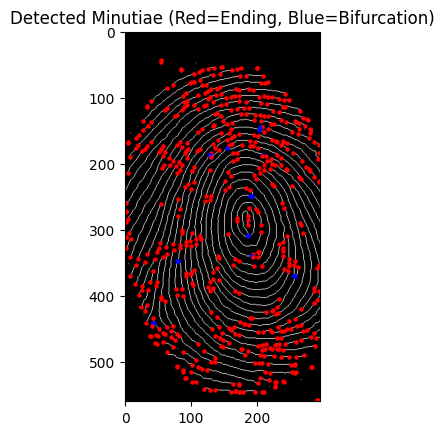

In [9]:
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import numpy as np
def extract_minutiae(skel):
    h, w = skel.shape
    points = []
    for y in range(1, h-1):
        for x in range(1, w-1):
            if skel[y, x]:
                n = np.sum(skel[y-1:y+2, x-1:x+2]) - 1
                if n == 1: points.append((x, y, 'ending'))
                elif n == 3: points.append((x, y, 'bifurcation'))
    return points

img = cv2.imread('DB2_B/101_1.tif', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5,5), 0)
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 15, 10)

skeleton = skeletonize(binary//255)
features = extract_minutiae(skeleton)

print(f"Detected {len(features)} minutiae points")

plt.imshow(skeleton, cmap='gray')
for x, y, t in features[:]:
    color = 'r' if t == 'ending' else 'b'
    plt.scatter(x, y, c=color, s=5)
plt.title("Detected Minutiae (Red=Ending, Blue=Bifurcation)")
plt.show()

In [10]:
from scipy.spatial.distance import cdist

def matchscore(f1, f2):
    A = np.array([(x,y) for x,y,_ in f1])
    B = np.array([(x,y) for x,y,_ in f2])
    dist = cdist(A,B)
    return np.mean(np.min(dist, axis=1))

img2 = cv2.imread('DB2_B/101_2.tif', 0)
f2 = extract_minutiae(skeletonize(cv2.adaptiveThreshold(cv2.GaussianBlur(img2, (5,5), 0), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10)//255))

img3 = cv2.imread('DB2_B/105_2.tif', 0)
f3 = extract_minutiae(skeletonize(cv2.adaptiveThreshold(cv2.GaussianBlur(img3, (5,5), 0), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10)//255))

print(f"매칭 점수 (낮을수록 유사) : {matchscore(features, f2)}")
print(f"매칭 점수 (낮을수록 유사) : {matchscore(features, f3)}")

매칭 점수 (낮을수록 유사) : 11.610673696888542
매칭 점수 (낮을수록 유사) : 13.269374650711875
